Upload dataset

In [1]:
from google.colab import files
files.upload()

Saving Loan.csv to Loan.csv


{'Loan.csv': b'ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore\n2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.35441791880765877,1,2,0.35833559969819156,0,Home,0,29,9,7632,1202,146111,19183,3329.0,0.7249720460524032,11,126928,0.19965200000000002,0.22758963035547056,419.8059915607372,0.18107719782539416,0,49.0\n2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.08782696820034872,5,3,0.33027366992885

Import required libraries

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Read and explore the data

In [3]:
credit_data = pd.read_csv('Loan.csv')
credit_data.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

Data columns

In [4]:
credit_data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

information about the data

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

Encoding object columns

In [6]:
encoder = LabelEncoder()
for i in credit_data.columns:
  if credit_data[i].dtype == 'object':
    credit_data[i] = encoder.fit_transform(credit_data[i])
credit_data.head()

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0                0   45         39948          617                 0   
1                1   38         39709          628                 0   
2                2   47         40724          570                 0   
3                3   58         69084          545                 0   
4                4   37        103264          594                 0   

   EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  ...  \
0               4          22       13152            48              1  ...   
1               0          15       26045            48              2  ...   
2               1          26       17627            36              1  ...   
3               3          34       37898            96              2  ...   
4               0          17        9184            36              1  ...   

   MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                    0.724972         11    126928   
1    3309.083333                    0.935132          3     43609   
2    3393.666667                    0.872241          6      5205   
3    5757.000000                    0.896155          5     99452   
4    8605.333333                    0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

   LoanApproved  RiskScore  
0             0       49.0  
1             0       52.0  
2             0       52.0  
3             0       54.0  
4             1       36.0  

[5 rows x 36 columns]

correlation_matrix to get the important features and extract patterns

In [7]:
correlation_matrix = credit_data.corr()
important_features = correlation_matrix['LoanApproved'].drop('LoanApproved').abs().sort_values(ascending=False)
print(important_features)

RiskScore                     0.766137
MonthlyIncome                 0.604101
AnnualIncome                  0.597900
TotalDebtToIncomeRatio        0.410399
InterestRate                  0.301646
BaseInterestRate              0.247263
LoanAmount                    0.239496
NetWorth                      0.187892
MonthlyLoanPayment            0.184272
TotalAssets                   0.184011
CreditScore                   0.142000
Age                           0.141029
Experience                    0.140755
LengthOfCreditHistory         0.105949
LoanDuration                  0.094558
BankruptcyHistory             0.070751
MonthlyDebtPayments           0.070415
PreviousLoanDefaults          0.065343
PaymentHistory                0.030804
TotalLiabilities              0.029434
EmploymentStatus              0.020411
EducationLevel                0.019650
HomeOwnershipStatus           0.018135
CreditCardUtilizationRate     0.010466
LoanPurpose                   0.007062
MaritalStatus            

Display the heatmap

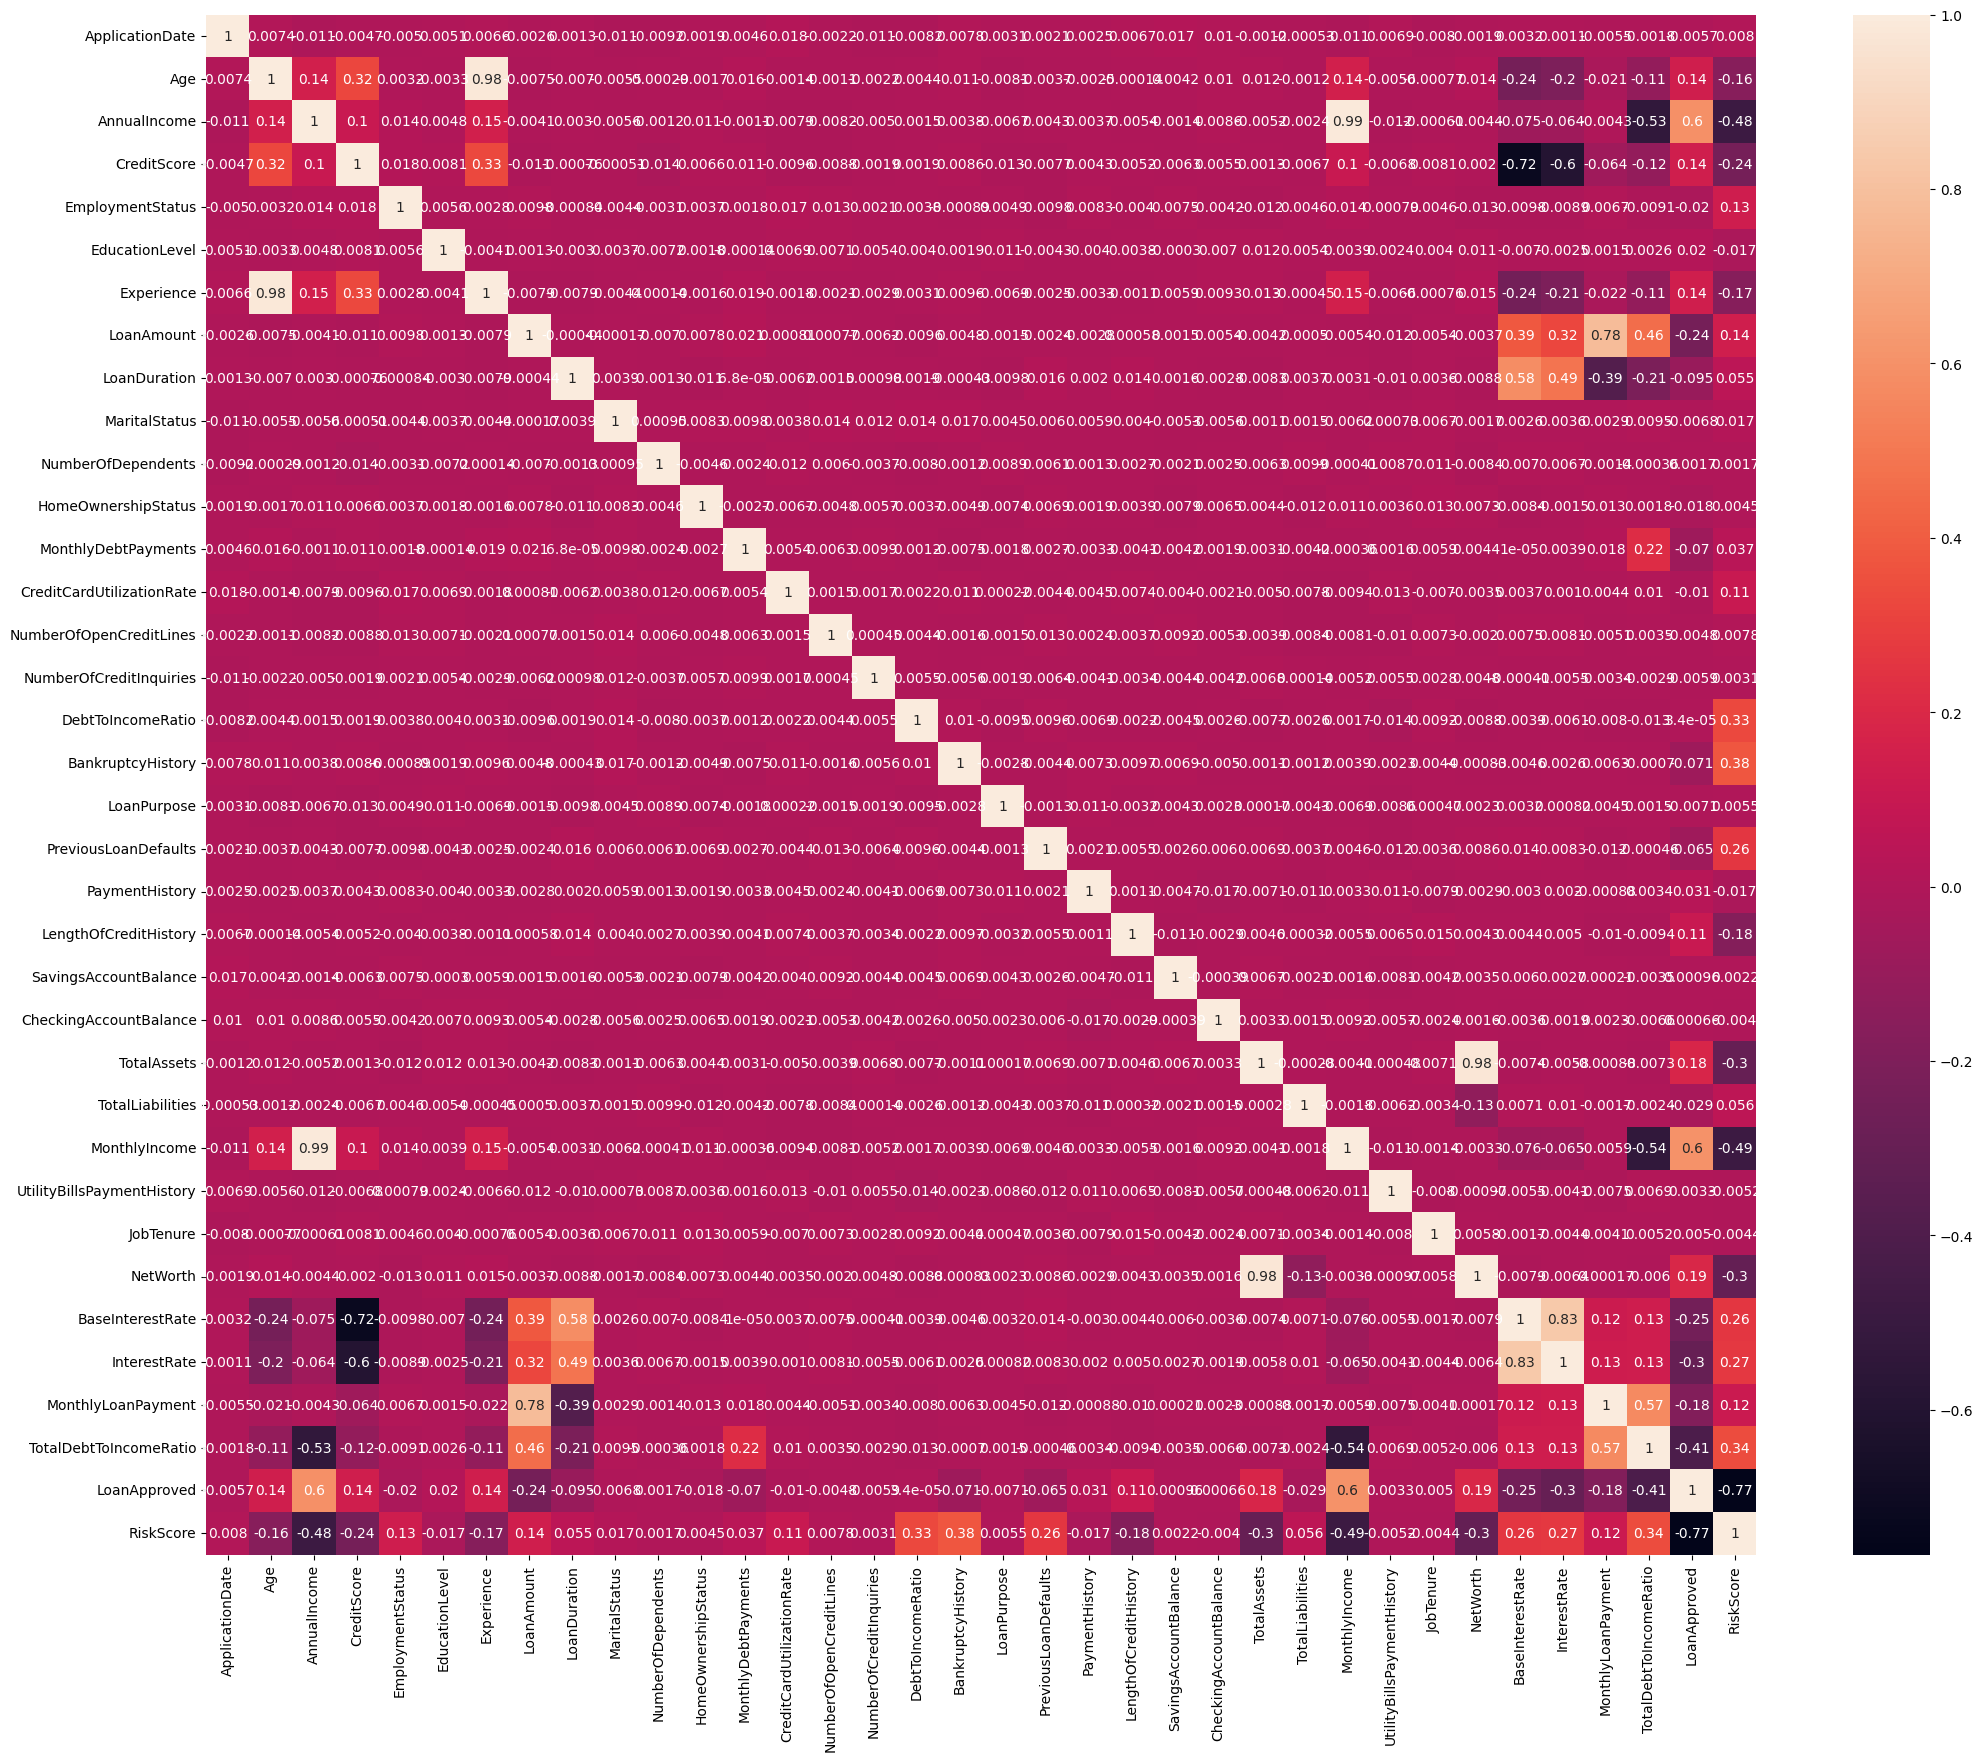

In [14]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

the most important features

In [10]:
the_most_important = important_features.head(19)
print(the_most_important)

RiskScore                 0.766137
MonthlyIncome             0.604101
AnnualIncome              0.597900
TotalDebtToIncomeRatio    0.410399
InterestRate              0.301646
BaseInterestRate          0.247263
LoanAmount                0.239496
NetWorth                  0.187892
MonthlyLoanPayment        0.184272
TotalAssets               0.184011
CreditScore               0.142000
Age                       0.141029
Experience                0.140755
LengthOfCreditHistory     0.105949
LoanDuration              0.094558
BankruptcyHistory         0.070751
MonthlyDebtPayments       0.070415
PreviousLoanDefaults      0.065343
PaymentHistory            0.030804
Name: LoanApproved, dtype: float64


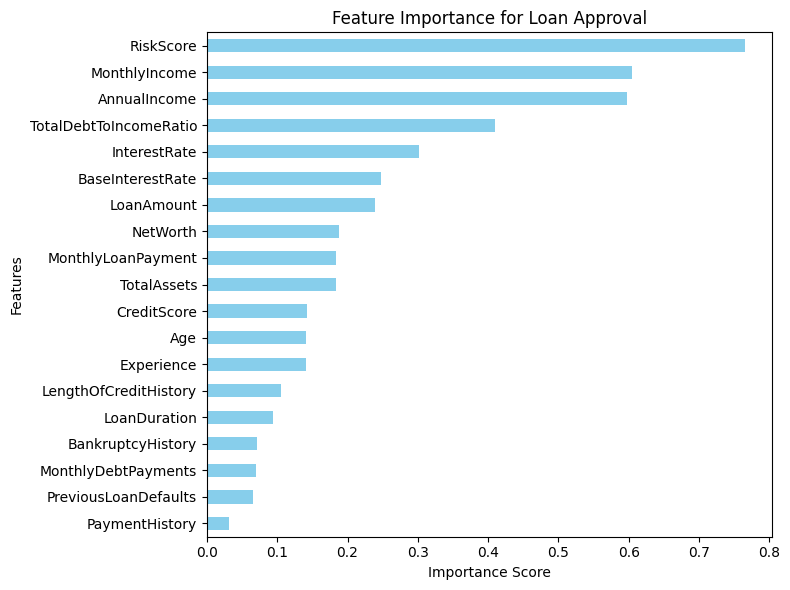

In [17]:
feat_imp = pd.Series(the_most_important).sort_values()

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh', color="skyblue")
plt.title("Feature Importance for Loan Approval")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Some visualizations

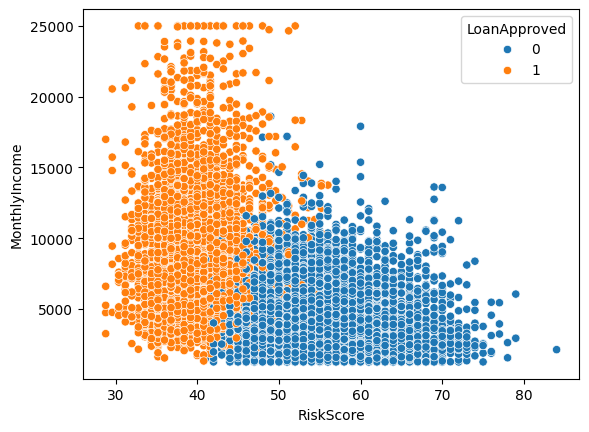

In [16]:
sns.scatterplot(data=credit_data, x='RiskScore', y='MonthlyIncome', hue = 'LoanApproved')
plt.show()

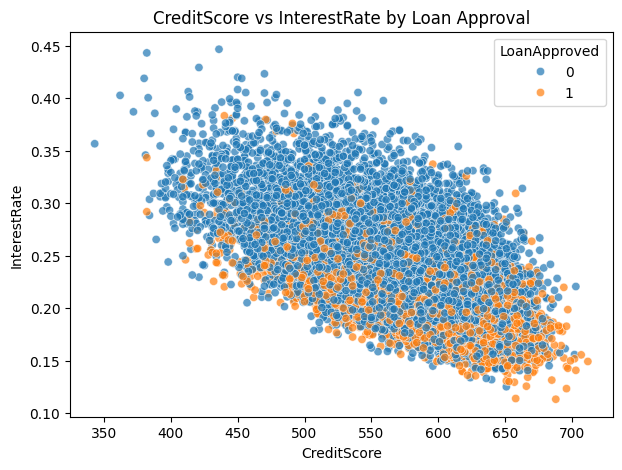

In [20]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=credit_data, x="CreditScore", y="InterestRate", hue="LoanApproved", alpha=0.7)
plt.title("CreditScore vs InterestRate by Loan Approval")
plt.show()

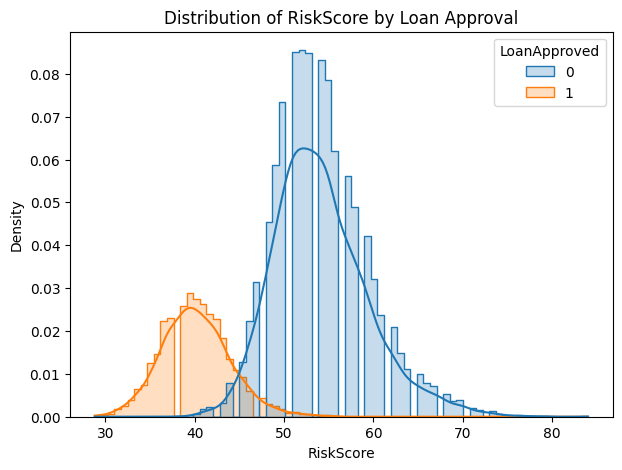

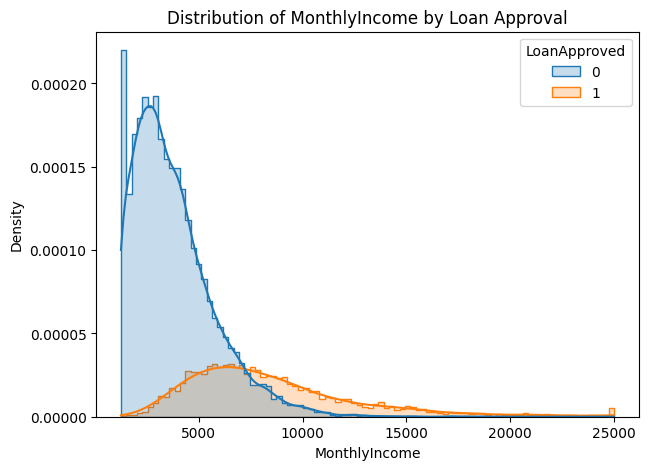

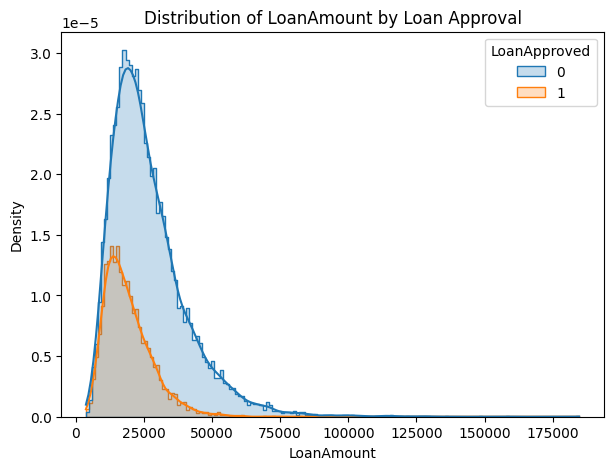

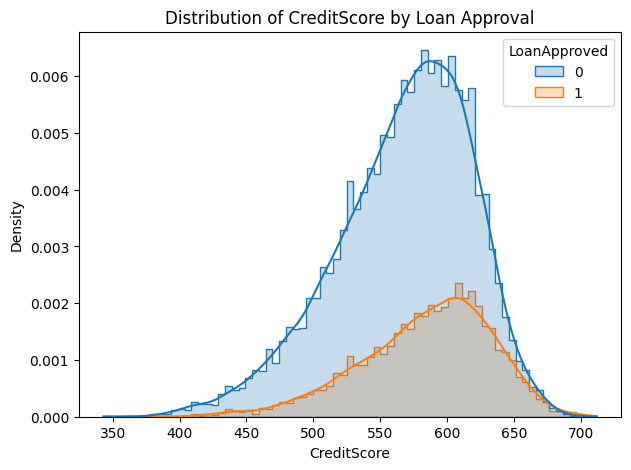

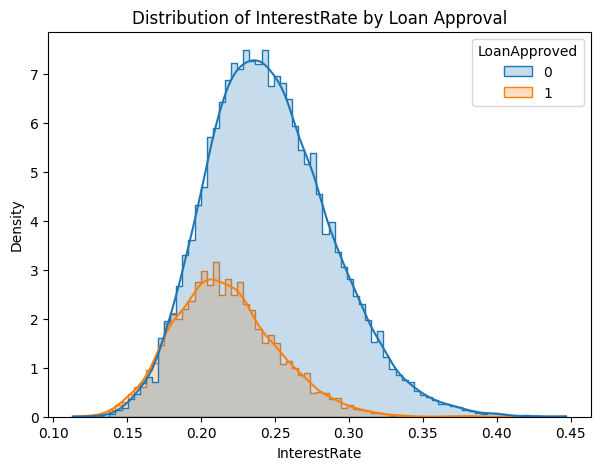

In [22]:
key_features = ["RiskScore", "MonthlyIncome", "LoanAmount", "CreditScore", "InterestRate"]

for col in key_features:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=credit_data, x=col, hue="LoanApproved", kde=True, element="step", stat="density")
    plt.title(f"Distribution of {col} by Loan Approval")
    plt.show()

Check the balance of the data

/tmp/ipython-input-4742547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit_data, x="LoanApproved", palette="Set2")


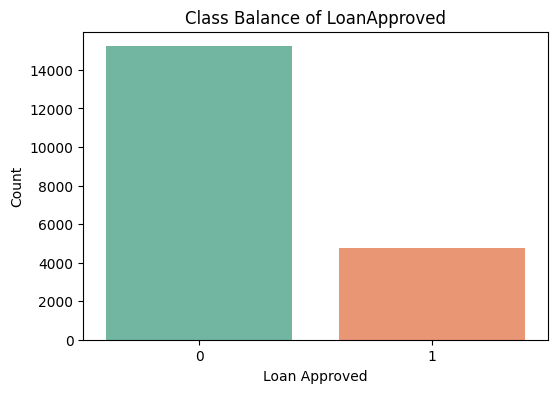

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=credit_data, x="LoanApproved", palette="Set2")
plt.title("Class Balance of LoanApproved")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [26]:
X = credit_data[the_most_important.index]
y = credit_data['LoanApproved']

Apply over_sampling technique to make the data balanced

In [28]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Before:", y.value_counts())
print("After:", y_res.value_counts())

Before: LoanApproved
0    15220
1     4780
Name: count, dtype: int64
After: LoanApproved
0    15220
1    15220
Name: count, dtype: int64


Splitting the data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

Scaling the data

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

fit the logistic model

In [60]:
logistic_model = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

get logistic model prediction

In [61]:
y_pred = logistic_model.predict(x_test)

logistic model evaluation

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9928821725799387
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4564
           1       0.99      0.99      0.99      4568

    accuracy                           0.99      9132
   macro avg       0.99      0.99      0.99      9132
weighted avg       0.99      0.99      0.99      9132

Confusion Matrix:
 [[4524   40]
 [  25 4543]]


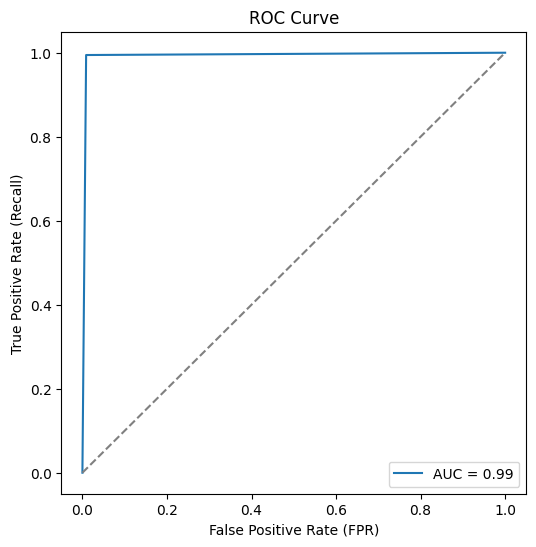

In [63]:
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

fit decision tree model

In [74]:
decision_model = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

get decision model prediction

In [75]:
y_pred = decision_model.predict(x_test)

decision model evaluation

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9820411738939991
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4564
           1       0.98      0.98      0.98      4568

    accuracy                           0.98      9132
   macro avg       0.98      0.98      0.98      9132
weighted avg       0.98      0.98      0.98      9132

Confusion Matrix:
 [[4489   75]
 [  89 4479]]


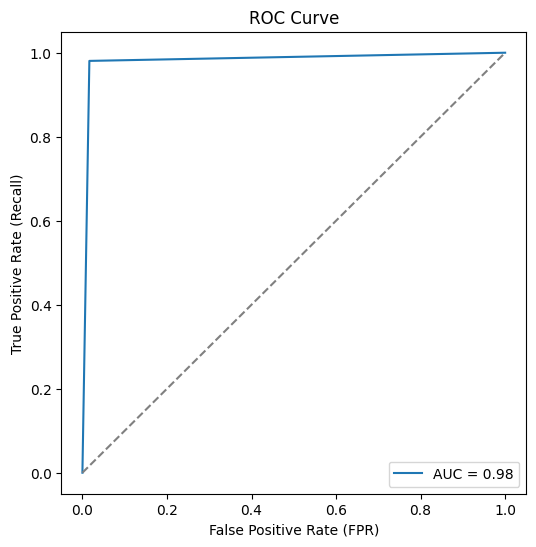

In [77]:
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

fit Random forest model

In [79]:
random_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5,
    min_samples_leaf=2, max_features="sqrt", class_weight="balanced_subsample", random_state=42, n_jobs=-1)
random_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

get random forest model prediction

In [80]:
y_pred = random_model.predict(x_test)

random forest evaluation

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9903635567236093
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4564
           1       0.99      0.99      0.99      4568

    accuracy                           0.99      9132
   macro avg       0.99      0.99      0.99      9132
weighted avg       0.99      0.99      0.99      9132

Confusion Matrix:
 [[4516   48]
 [  40 4528]]


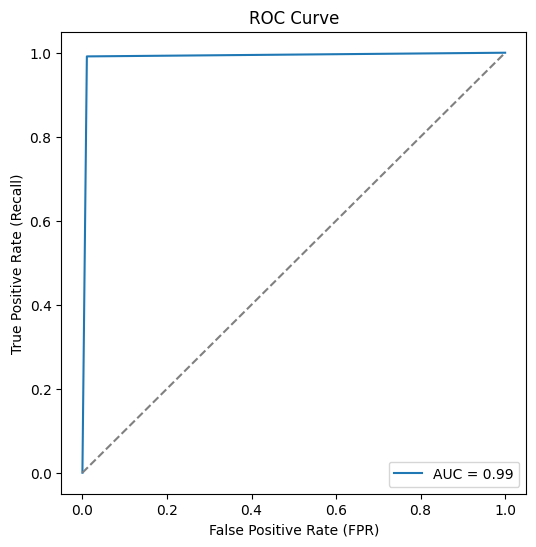

In [82]:
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()